In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [226]:
data = load_diabetes()
data.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [227]:
X= data.data
y = data.target

In [228]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [229]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [230]:
lr.fit(X_train , y_train)

LinearRegression()

In [231]:

print(lr.coef_)
print(lr.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [232]:
y_pred = lr.predict(X_test)


from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [233]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0)

In [234]:
ridge.fit(X_train,y_train)
print(ridge.coef_)
print(ridge.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [235]:
y_pred = ridge.predict(X_test)

print("r2_score" , r2_score(y_test , y_pred))
print("Mse" , np.sqrt(mean_squared_error(y_test , y_pred)))


r2_score 0.5188113124539249
Mse 48.72713760953252


# Better code 


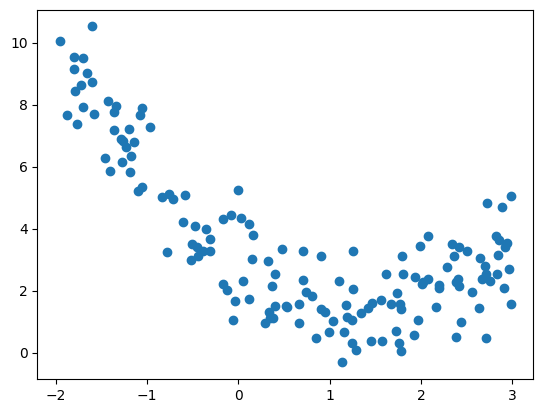

In [236]:
x1 = np.random.rand(150 , 1) *5 -2
x2 = 0.7 * x1 **2 - 2 * x1 + 3 + np.random.randn(150,1)
plt.scatter(x1,x2)
plt.show()

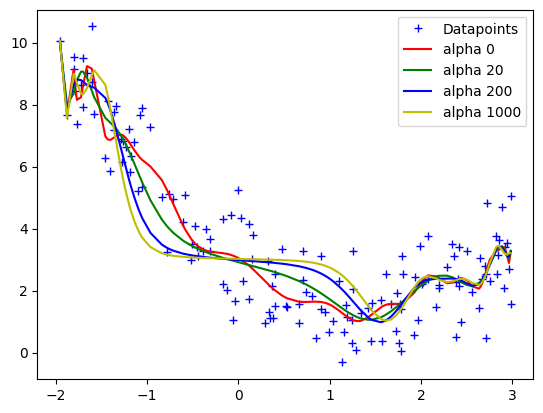

In [237]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_ridge_prediction(x1,x2,alpha) : 
    model  = Pipeline([
        ("poly",PolynomialFeatures(degree = 30)) , 
        ('ridge' , Ridge(alpha = alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

alphas = [0, 20, 200 , 1000]
cs = ['r', 'g', 'b' , 'y']

plt.plot(x1,x2,'b+' , label = 'Datapoints')

sorted_indices = np.argsort(x1.flatten())
x1_sorted= x1[sorted_indices]

for alpha , c  in zip(alphas , cs):
    y_pred = get_ridge_prediction(x1, x2, alpha)

    sorted_indices = np.argsort(x1.flatten())
    x1_sorted= x1[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]

    plt.plot(x1_sorted , y_pred_sorted ,c , label = f"alpha {alpha}")

plt.legend()
plt.show()
